<a href="https://colab.research.google.com/github/Stefansse/Datascienceproject/blob/master/DataScienceproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard DS project
Used Kaggle dataset https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

Стефан Стошевски 195085

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/datasets/data.csv')
df.dropna(subset= ['Sentiment'], inplace=True)

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


# Data Preprocessing

In [ ]:
x= df.iloc[:,:-1].values

In [ ]:
y= df.iloc[:,1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
y

array([2, 0, 2, ..., 1, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

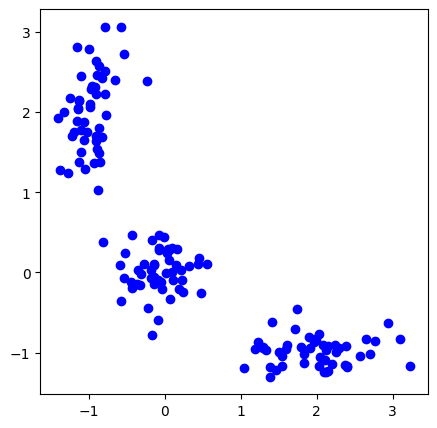

In [ ]:
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')

#Clustering

In [ ]:
pip install transformers

In [ ]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df.Sentence.values)

In [ ]:
message_embeddings

<tf.Tensor: shape=(5842, 512), dtype=float32, numpy=
array([[-0.0593038 ,  0.04993128, -0.01207693, ..., -0.01926793,
         0.01342692, -0.02744069],
       [ 0.02456418, -0.07547285,  0.00669665, ..., -0.00689482,
        -0.01801056,  0.01165533],
       [-0.04653093,  0.01594672, -0.07761645, ..., -0.03909595,
        -0.06689393,  0.04936293],
       ...,
       [ 0.01730982, -0.06539147, -0.05769159, ...,  0.02715988,
         0.01090902, -0.08330511],
       [ 0.02767268,  0.06637509, -0.00682048, ...,  0.0330438 ,
         0.04759659,  0.03529988],
       [-0.00923745, -0.01201572,  0.07335094, ..., -0.02394929,
         0.00813983, -0.08172777]], dtype=float32)>

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,n_init=10)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(10)

df_new = pca.fit_transform(data)

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10)

label = kmeans.fit_predict(df_new)

u_labels = np.unique(label)

labels = kmeans.labels_

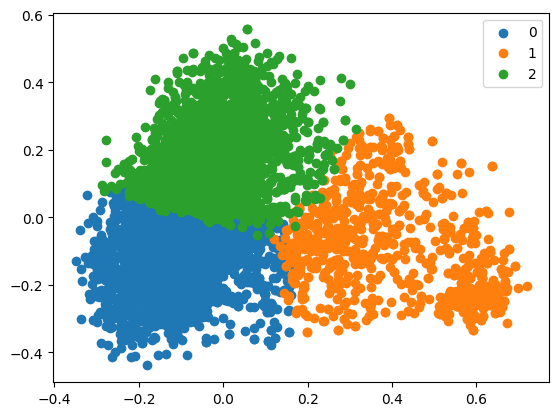

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
 from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(2)


df_new = pca.fit_transform(data)

from sklearn.cluster import AgglomerativeClustering

from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(df_new, n_neighbors=10, include_self=False)
model = AgglomerativeClustering(n_clusters=3, connectivity=connectivity, linkage='ward').fit(df_new)


In [ ]:
clusters = model.labels_.tolist()

In [ ]:
model.labels_

array([2, 0, 1, ..., 0, 1, 2])

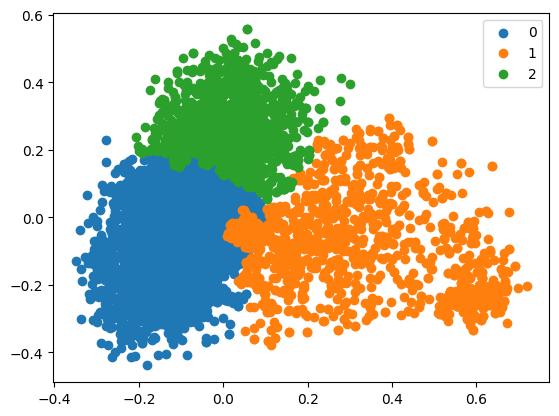

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = model.fit_predict(df_new)

u_labels = np.unique(label)


for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

# Sentiment analysis(LSTM)

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from sklearn.metrics import accuracy_score

In [ ]:
X = df['Sentence'].values
y = df['Sentiment'].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [ ]:
max_words = 5000
max_sequence_length = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=max_sequence_length)

In [ ]:
embedding_vector_length = 32
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           337920    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 354,571
Trainable params: 354,571
Non-trainable params: 0
________________________________________________

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
78/78 [==============================] - 57s 594ms/step - loss: -0.7934 - accuracy: 0.5349 - val_loss: -1.7449 - val_accuracy: 0.5359
Epoch 2/5
78/78 [==============================] - 33s 426ms/step - loss: -2.1741 - accuracy: 0.5358 - val_loss: -2.6219 - val_accuracy: 0.5359
Epoch 3/5
78/78 [==============================] - 33s 426ms/step - loss: -2.9763 - accuracy: 0.5358 - val_loss: -3.3565 - val_accuracy: 0.5359
Epoch 4/5
78/78 [==============================] - 35s 443ms/step - loss: -3.7122 - accuracy: 0.5358 - val_loss: -4.0741 - val_accuracy: 0.5359
Epoch 5/5
78/78 [==============================] - 32s 409ms/step - loss: -4.3892 - accuracy: 0.5358 - val_loss: -4.7061 - val_accuracy: 0.5359


In [ ]:
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

28/28 [==============================] - 1s 39ms/step


In [ ]:
accuracy = accuracy_score(y_val, y_pred_binary)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

Validation Accuracy: 53.59%


# Sentiment Analysis(XGBoost)

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df['Sentence'].values
y = df['Sentiment'].values
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_numerical, test_size=0.15, random_state=42, stratify=y_numerical)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [ ]:
model = XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred = model.predict(X_val_tfidf)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy: {:.2f}%".format(accuracy * 100))

Validation Accuracy: 68.42%


# Test model on sentences to see if it predicts correctly

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
X = df['Sentence']
y = df['Sentiment']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_tfidf, y_encoded)

LogisticRegression(max_iter=1000)

In [ ]:
def predict_sentiment(sentence):
    sentence_tfidf = tfidf_vectorizer.transform([sentence])
    sentiment_encoded = model.predict(sentence_tfidf)
    predicted_sentiment = label_encoder.inverse_transform(sentiment_encoded)
    return predicted_sentiment[0]

In [ ]:
input_sentence = "Shell's $70 Billion BG Deal Meets Shareholder Skepticism"

In [ ]:
predicted_sentiment = predict_sentiment(input_sentence)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: negative
